In [129]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score

import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv('data/application_info.csv', low_memory=False)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 98 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 307511 non-null  int64  
 1   id                         307511 non-null  int64  
 2   default                    307511 non-null  int64  
 3   contract_type              307511 non-null  object 
 4   gender                     307511 non-null  object 
 5   flag_vehicle               307511 non-null  object 
 6   flag_properties            307511 non-null  object 
 7   num_children               307511 non-null  int64  
 8   total_income               307511 non-null  object 
 9   loan_amount                307511 non-null  object 
 10  anual_payment              307499 non-null  object 
 11  product_amount             307233 non-null  object 
 12  accompained                306219 non-null  object 
 13  income_type                30

,Unnamed: 0,id,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,...,total_area,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year
0,0,100002,1,personal loan,M,N,Y,0,202500,"406597,5",...,"0,0149",brick,N,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,personal loan,F,N,N,0,270000,"1293502,5",...,"0,0714",concrete,N,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,credit card,M,Y,Y,0,67500,135000,...,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,personal loan,F,N,Y,0,135000,"312682,5",...,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,0,personal loan,M,N,Y,0,121500,513000,...,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
df.sample(10)

,Unnamed: 0,id,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,...,total_area,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year
36820,36820,142643,0,personal loan,F,Y,Y,0,166500,9e+05,...,NaN,NaN,NaN,-160.0,0.0,0.0,0.0,0.0,0.0,3.0
287882,287882,433489,0,personal loan,F,N,Y,0,216000,1125000,...,NaN,NaN,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,NaN
118584,118584,237515,0,personal loan,F,N,Y,1,130500,427500,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
30760,30760,135702,0,personal loan,F,N,Y,0,54000,210456,...,NaN,NaN,NaN,-421.0,0.0,0.0,0.0,0.0,0.0,1.0
242533,242533,380743,0,personal loan,F,N,Y,0,67500,360000,...,NaN,NaN,NaN,-2254.0,0.0,0.0,0.0,0.0,0.0,4.0
91701,91701,206491,0,personal loan,F,N,N,1,171000,755190,...,"0,0073",brick,N,-1773.0,0.0,0.0,0.0,0.0,0.0,2.0
221908,221908,357064,0,personal loan,M,Y,Y,0,157500,221031,...,NaN,NaN,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN
40570,40570,146987,0,credit card,F,N,N,0,135000,180000,...,NaN,NaN,NaN,-1912.0,0.0,0.0,0.0,1.0,0.0,6.0
103817,103817,220490,0,personal loan,F,N,Y,0,90000,450000,...,NaN,NaN,NaN,-1743.0,0.0,0.0,0.0,0.0,0.0,3.0
269684,269684,412538,0,credit card,F,N,Y,0,126000,202500,...,NaN,NaN,NaN,-583.0,0.0,0.0,0.0,0.0,0.0,1.0


# Preprocessing and EDA

Some numeric variabes have a , as decimal separator, I will find them to change it to . and convert the variables to numeric

In [132]:
# Find variables with comma (,)
cols_with_comma = list()
for col in df.select_dtypes('object').columns:
    if any(df[col].str.contains(',')):
        cols_with_comma.append(col)
    else:
        pass
    
print(len(cols_with_comma))
print(cols_with_comma)

57
['total_income', 'loan_amount', 'anual_payment', 'product_amount', 'accompained', 'normalised_pop', 'registry_age', 'occupation', 'external_score_1', 'external_score_2', 'external_score_3', 'num_apart_average', 'area_basement_average', 'age_expl_average', 'age_building_average', 'area_common_average', 'num_lifts_average', 'num_entries_average', 'max_floor_average', 'min_floor_average', 'area_building_average', 'num_apart_habit_average', 'area_habit_average', 'num_apart_nohabit_average', 'area_nohabit_average', 'num_apart_mode', 'area_basement_mode', 'age_expl_mode', 'age_building_mode', 'area_common_mode', 'num_lifts_mode', 'num_entries_mode', 'max_floor_mode', 'min_floor_mode', 'area_building_mode', 'num_apart_habit_mode', 'area_habit_mode', 'num_apart_nohabit_mode', 'area_nohabit_mode', 'num_apart_median', 'area_basement_median', 'age_expl_median', 'age_building_median', 'area_common_median', 'num_lifts_median', 'num_entries_median', 'max_floor_median', 'min_floor_median', 'area_b

In [133]:
# Check wich ones are really numeric columns
#for col in cols_with_comma:
#    print(df[col].sample(10))

In [134]:
not_numeric_with_comma = ['emergency_exits', 'wall_materials', 'type_building', 'occupation', 'accompained']

In [135]:
# Change , by . and convert to numeric
for col in [col for col in cols_with_comma if col not in not_numeric_with_comma]:
    df[col] = df[col].str.replace(',', '.').astype(float)

#df.info()

Delete columns that do not have data

In [136]:
df.drop(['Unnamed: 0','education', 'residence_type'], axis=1, inplace=True)

## Analysis fo missing values

<AxesSubplot:>

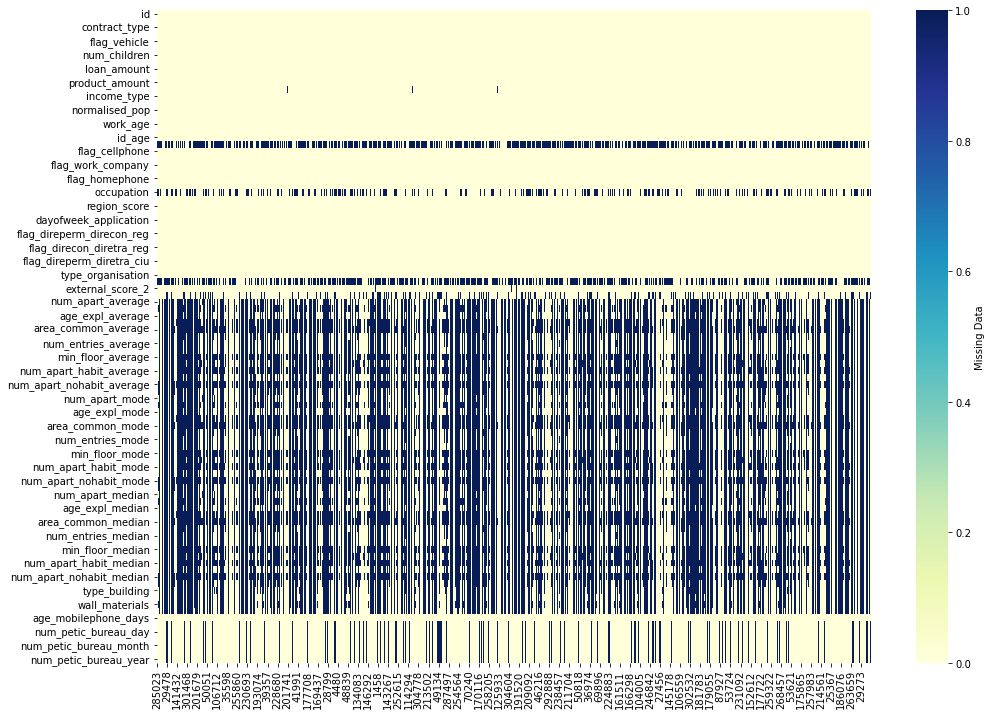

In [139]:
#plt.figure(figsize=(16,12))
#sns.heatmap(df.sample(100000).isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

Prop. positive class: 8.1%


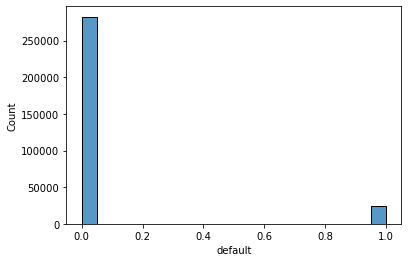

In [54]:
sns.histplot(df['default'])
print('Prop. positive class: {}%'.format(round(df['default'].mean(),3)*100))

(8947, 95)
Prop. positive class: 6.1%


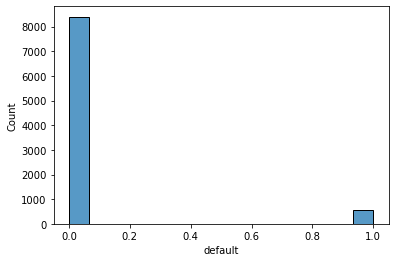

In [140]:
df_nna = df.dropna()
print(df_nna.dropna().shape)
sns.histplot(df_nna['default'])
print('Prop. positive class: {}%'.format(round(df_nna['default'].mean(),3)*100))

When deleting missing values the proportion of the positive class decreases, this means that 1) the missings are not missing at random 2) there are more missing values on the rows of those who default the credit. This brings me the idea of creating a column that accounts for this information

In [141]:
# Column for number of missing information (number of columns with na for each row)
df['missing_count'] = df.isnull().sum(axis=1)

<AxesSubplot:title={'center':'Prop. of missing values'}>

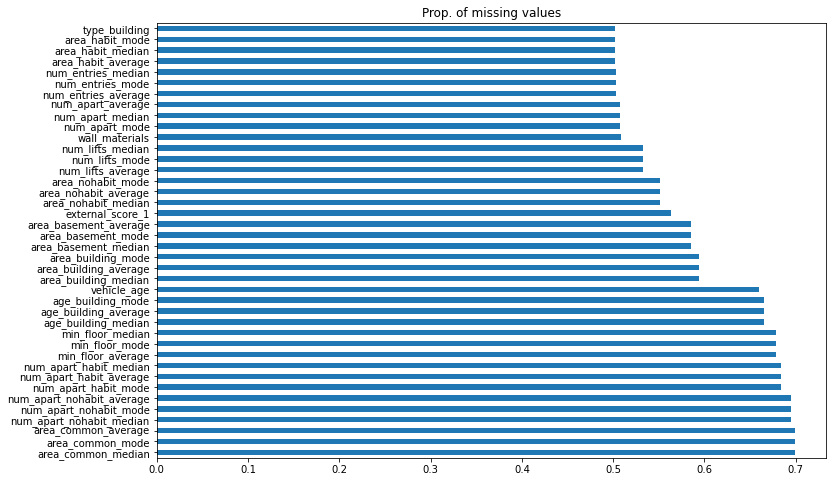

In [142]:
plt.figure(figsize=(12,8))
df.isnull().mean().sort_values(ascending=False)[:40].plot(kind='barh', title='Prop. of missing values')

<AxesSubplot:title={'center':'Prop. of missing values'}>

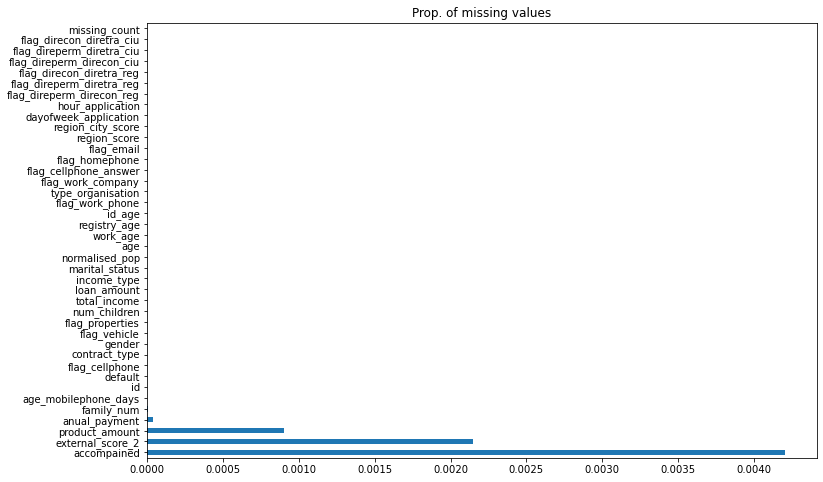

In [143]:
plt.figure(figsize=(12,8))
df.isnull().mean().sort_values(ascending=False)[-40:].plot(kind='barh', title='Prop. of missing values')

Correlation plots:

<AxesSubplot:title={'center':'Corr with Target (positive)'}>

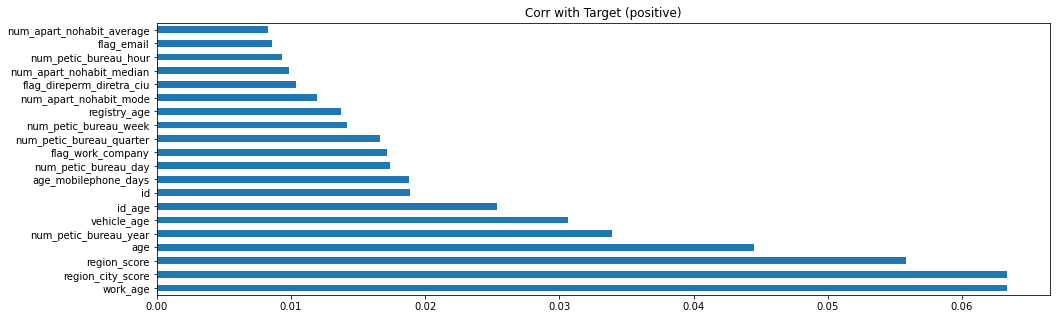

In [144]:
plt.figure(figsize=(16,5))
df_nna.corr()['default'].sort_values(ascending=False)[1:21].plot(kind='barh', title='Corr with Target (positive)')

<AxesSubplot:title={'center':'Corr with Target (positive)'}>

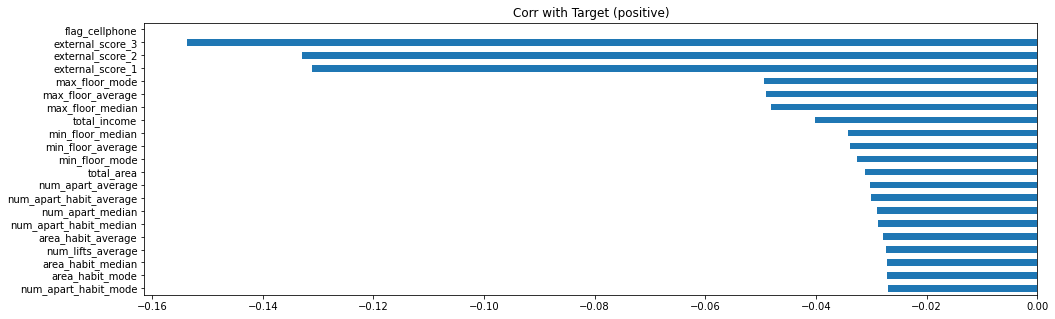

In [145]:
plt.figure(figsize=(16,5))
df_nna.corr()['default'].sort_values(ascending=False)[-21:].plot(kind='barh', title='Corr with Target (positive)')

***What are the most important features in the dataframe with no missing data?***



In [146]:
y_nna = df_nna['default']
X_nna = df_nna.drop(['default'], axis=1)

X_nna = pd.get_dummies(X_nna)

In [147]:
# Simple Logit for feature importance
scaler = StandardScaler()

X_nna_s = scaler.fit_transform(X_nna)

lr_feat_impor = LogisticRegression(penalty='l1', max_iter = 1000, solver='liblinear')
lr_feat_impor.fit(X_nna_s, y_nna)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

<AxesSubplot:title={'center':'Top 30 colums according to Logistic Regression'}>

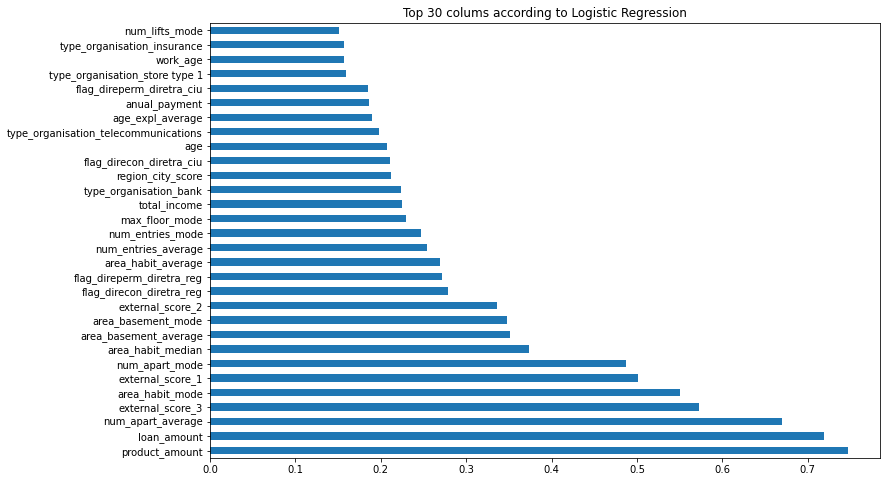

In [148]:
# Plot of feature importance
plt.figure(figsize=(12,8))
lr_feat_impor_s = pd.Series(data=lr_feat_impor.coef_.reshape(-1), index=X_nna.columns).abs()
lr_feat_impor_s.sort_values(ascending=False)[:30].plot(kind='barh', 
                                                       title='Top 30 colums according to Logistic Regression')


<AxesSubplot:title={'center':'Top 30 colums according to Logistic Regression'}>

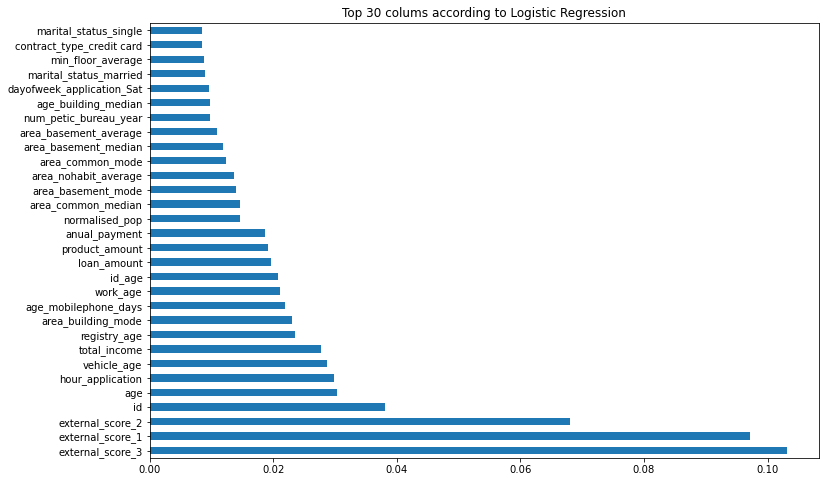

In [149]:
# Simple decision tree for feature importance
dt_feat_impor = DecisionTreeClassifier(class_weight='balanced')
dt_feat_impor.fit(X_nna_s, y_nna)

plt.figure(figsize=(12,8))
dt_feat_impor_s = pd.Series(data=dt_feat_impor.feature_importances_, index=X_nna.columns).abs()
dt_feat_impor_s.sort_values(ascending=False)[:30].plot(kind='barh', title='Top 30 colums according to Logistic Regression')

Here, rather that asses the feature importance, I want to know what columns are not important and delete those that have many missing values.

In [150]:
# Feature importance lr
lr_feat_impor_df = lr_feat_impor_s.to_frame().reset_index()
lr_feat_impor_df.columns = ['Colname', 'LR_Importance']

# Feature imporntance DT
dt_feat_impor_df = dt_feat_impor_s.to_frame().reset_index()
dt_feat_impor_df.columns = ['Colname', 'DT_Importance']

# Prop of missing values
mv_df = df.isnull().mean().to_frame().reset_index()
mv_df.columns = ['Colname', 'Prop_missing']

# Correlation with the target variable
corr_df = df.corr()['default'].abs().to_frame().reset_index()
corr_df.columns = ['Colname', 'Corr_Importance']

# One dataframe with al the info
missing_a = lr_feat_impor_df.merge(dt_feat_impor_df, on='Colname')
missing_a = missing_a.merge(mv_df, on='Colname')
missing_a = missing_a.merge(corr_df, on='Colname')

missing_a.set_index('Colname', inplace=True)
missing_a.sort_values(by='Prop_missing', ascending=True,inplace=True)
#missing_a

<AxesSubplot:title={'center':'Feature importance (LR, DT and corr) vs. Proportion of missing values [numeric columns]'}, ylabel='Colname'>

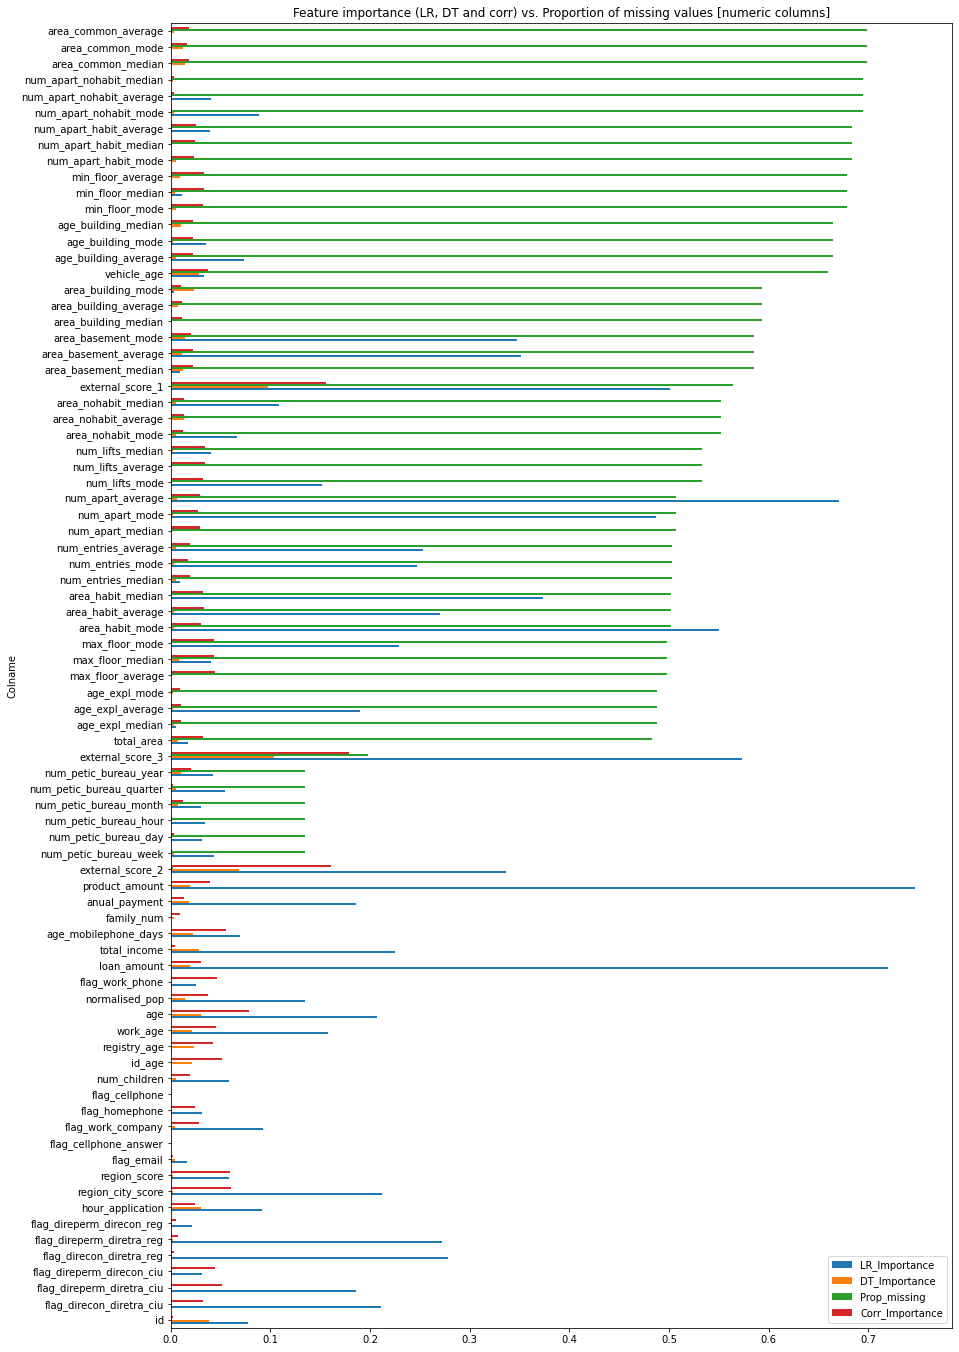

In [151]:
missing_a.plot(kind='barh', 
               figsize=(14,24), 
               title='Feature importance (LR, DT and corr) vs. Proportion of missing values [numeric columns]')

Given the plot above, some columns with a high amount of missing values have low explanatory power or importance. I will delete those columns but keep the information that there were missing values on those variables.

Dummies for missing values for each variable with missing data:

In [152]:
cols_wmissings = list(mv_df.query("Prop_missing>0")['Colname']) # Cols with missing values
num_petic_vars = [col for col in cols_wmissings if col.startswith('num_petic_')] # Cols from petic-bureau

# Cols to create dummies that indicate if there is data or not in that variable
cols_to_dummy_missing = [col for col in cols_wmissings if col.endswith(('mode', 'average'))==False]
cols_to_dummy_missing = [col for col in cols_to_dummy_missing if col not in num_petic_vars[1:]]

# New columns
for col in cols_to_dummy_missing:
    df[col+'_NA'] = df[col].isna().astype(int)

Delete columns with low importance given the analysis above:

In [153]:
# Look the criteria to delete the columns: more that a 40% of missing and importance lower that 0.1 in the graphs above
to_detele_cols = missing_a.query("Prop_missing>0.4 & LR_Importance<0.1 & DT_Importance<0.1 & Corr_Importance<0.1").sort_values(by='LR_Importance', ascending=False).index.to_list()
print(len(to_detele_cols))
df.drop(to_detele_cols, axis=1, inplace=True)

31


Fill missing with cero because probabily those varables are for people has that the asset, for example house with a basement

In [154]:
fill_with_0 = ['area_basement_mode', 'area_basement_average', 'area_nohabit_median', 'num_lifts_mode', 'num_apart_average',
              'num_apart_mode', 'num_entries_mode', 'num_entries_average', 'area_habit_median', 'area_habit_mode', 'area_habit_average',
              'max_floor_mode', 'emergency_exits']

df[fill_with_0]= df[fill_with_0].fillna(0)

Filling with kind: 'unknowing'

In [156]:
fill_with_unknow = ['wall_materials', 'occupation', 'type_building']
df[fill_with_unknowing] = df[fill_with_unknowing].fillna('fill_with_unknow')

Other in accompained to fill missing values

In [177]:
df['accompained'] = df['accompained'].replace(to_replace=['other_2', 'other_1', 'group', np.nan], value='other')

In [182]:
df[['external_score_1', 'external_score_2',  'external_score_3']].describe()

,external_score_1,external_score_2,external_score_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


In [181]:
df.isnull().mean().sort_values(ascending=False)[:20]
#df.dropna().info()

external_score_1            0.563811
age_expl_average            0.487810
external_score_3            0.198253
num_petic_bureau_year       0.135016
num_petic_bureau_day        0.135016
num_petic_bureau_quarter    0.135016
num_petic_bureau_month      0.135016
num_petic_bureau_week       0.135016
num_petic_bureau_hour       0.135016
external_score_2            0.002146
product_amount              0.000904
anual_payment               0.000039
family_num                  0.000007
age_mobilephone_days        0.000003
anual_payment_NA            0.000000
product_amount_NA           0.000000
accompained_NA              0.000000
vehicle_age_NA              0.000000
occupation_NA               0.000000
id                          0.000000
dtype: float64

In [ ]:
# Fillna

In [14]:
# Filling missings that are naturally 0
fill_na_0 = ['area_common_median', 'area_common_mode', 'area_common_average', 'num_apart_nohabit_median', 'num_apart_nohabit_mode', 'num_apart_nohabit_average',
             'min_floor_average', 'min_floor_mode', 'min_floor_median', 'area_basement_median', 'area_basement_mode', 'area_basement_average',
             'area_nohabit_median', 'area_nohabit_average', 'area_nohabit_mode', 'num_lifts_average', 'num_lifts_mode',
             'num_lifts_median', 'num_apart_mode', 'num_apart_median', 'num_apart_average', 'area_habit_average', 'area_habit_median', 'area_habit_mode',
             'total_area']

#fill_na_1 = []
#df.


# age_building_..., 'vehicle_age', area_building_..., 'external_score_1', 'wall_materials' , num_entries_..., 
# 'type_building', max_floor_..., age_expl_..., 'total_area', 'emergency_exits', 'occupation', 'external_score_3'




In [271]:
target_cols = fill_na_0
rest_cols = [col for col in df.columns if col not in fill_na_0]

In [285]:
# Preprocessing of the data taken all the columns so far
target_cols_transformer =  Pipeline(steps = [('missing_creation', IfMissing(target_cols)),
                                             ('missings', FillWith0(target_cols)),
                                             ('dummies', ce.OneHotEncoder()),
                                             ('stardarizer', StandardScaler())])

rest_cols_transformer =    Pipeline(steps = [('missing_creation', IfMissing(rest_cols)),
                                             ('delete_cols', DropColsRowsNA()),
                                             ('dummies', ce.OneHotEncoder()),
                                             ('stardarizer', StandardScaler())])

preprocessor = ColumnTransformer(
   transformers=[
       ('target', target_cols_transformer, target_cols),
       ('rest', rest_cols_transformer, rest_cols)])

In [286]:
X = df.drop('default', axis=1)
y = df['default']

In [287]:
predict_out_pipeline = Pipeline(steps = [('preprocessing',  preprocessor), 
                                         ('classifier' , RandomForestClassifier())])

# Parameters of a random forest
outliers_pred_params = {'classifier__class_weight': ['balanced', None],
                        'classifier__random_state': [2022]}

outliers_pred_gs = GridSearchCV(predict_out_pipeline, 
                                outliers_pred_params, 
                                cv = 5, 
                                scoring='f1', 
                                n_jobs=-1, 
                                verbose=1)

In [ ]:
gs_result_0 = outliers_pred_gs.fit(X, y)

In [284]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted


class IfMissing(BaseEstimator, TransformerMixin):
    def __init__(self, cols_to_operate):
         self.columns = cols_to_operate
    
    def fit(self, X, y = None):
        self.X = X
        return self
 
    def transform(self, X):
        check_is_fitted(self, 'X')
        X = X.copy() 
        for col in self.columns:
            X[col+'_NA'] = X[col].isna().astype(int)
        return X
    
    

In [249]:
missing_label = FillWith0(fill_na_0)
missing_label.fit(df)
print(df.shape)
df_c = missing_label.transform(df)
print(df_c.shape)
df_c.head()

(307511, 96)
(307511, 96)


,id,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,anual_payment,...,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year,missing_count
0,100002,1,personal loan,M,N,Y,0,202500.0,406597.5,24700.5,...,brick,N,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,personal loan,F,N,N,0,270000.0,1293502.5,35698.5,...,concrete,N,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,100004,0,credit card,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,47
3,100006,0,personal loan,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,55
4,100007,0,personal loan,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,49


In [223]:
#df[['num_entries_average', 'num_entries_median', 'num_entries_mode']].describe()
(df['num_entries_average']==0).value_counts()

False    307188
True        323
Name: num_entries_average, dtype: int64

In [227]:
df['num_petic_bureau_hour'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: num_petic_bureau_hour, dtype: int64

In [228]:
df.isnull().mean().sort_values(ascending=False)[:5]

area_common_median          0.698723
area_common_mode            0.698723
area_common_average         0.698723
num_apart_nohabit_median    0.694330
num_apart_nohabit_mode      0.694330
dtype: float64

In [225]:
df.isnull().mean().sort_values(ascending=False)[40:80]

max_floor_mode              0.497608
max_floor_median            0.497608
max_floor_average           0.497608
age_expl_mode               0.487810
age_expl_average            0.487810
age_expl_median             0.487810
total_area                  0.482685
emergency_exits             0.473983
occupation                  0.313455
external_score_3            0.198253
num_petic_bureau_hour       0.135016
num_petic_bureau_day        0.135016
num_petic_bureau_week       0.135016
num_petic_bureau_month      0.135016
num_petic_bureau_quarter    0.135016
num_petic_bureau_year       0.135016
accompained                 0.004201
external_score_2            0.002146
product_amount              0.000904
anual_payment               0.000039
family_num                  0.000007
age_mobilephone_days        0.000003
id                          0.000000
default                     0.000000
flag_cellphone              0.000000
contract_type               0.000000
gender                      0.000000
f

In [ ]:
delete_1 = ['area_common_median' , 'area_common_median', 'area_common_average', 'num_apart_nohabit_average',
            'num_apart_nohabit_median']
delete_2 =

In [209]:
df.isnull().mean().sort_values(ascending=False)[:20]

area_common_median           0.698723
area_common_mode             0.698723
area_common_average          0.698723
num_apart_nohabit_median     0.694330
num_apart_nohabit_mode       0.694330
num_apart_nohabit_average    0.694330
num_apart_habit_mode         0.683550
num_apart_habit_average      0.683550
num_apart_habit_median       0.683550
min_floor_average            0.678486
min_floor_mode               0.678486
min_floor_median             0.678486
age_building_median          0.664978
age_building_average         0.664978
age_building_mode            0.664978
vehicle_age                  0.659908
area_building_median         0.593767
area_building_average        0.593767
area_building_mode           0.593767
area_basement_median         0.585160
dtype: float64

In [218]:
df[['num_apart_nohabit_average', 'num_apart_nohabit_mode', 'num_apart_nohabit_median', 'total_area']]

,num_apart_nohabit_average,num_apart_nohabit_mode,num_apart_nohabit_median,total_area
0,0.0000,0.0,0.0000,0.0149
1,0.0039,0.0,0.0039,0.0714
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
307506,0.0753,0.0,0.0757,0.2898
307507,0.0000,0.0,0.0000,0.0214
307508,0.0000,0.0,0.0000,0.7970
307509,NaN,NaN,NaN,0.0086


In [ ]:
'total_area', 'num_apart_habit_median','num_apart_nohabit_median'

In [137]:
lr_feat_impor_s[lr_feat_impor_s==0].index

Index(['id_age', 'flag_cellphone', 'flag_cellphone_answer', 'family_num',
       'area_common_average', 'num_lifts_average', 'max_floor_average',
       'min_floor_average', 'area_building_average', 'area_nohabit_average',
       'age_expl_mode', 'area_common_mode', 'min_floor_mode',
       'num_apart_habit_mode', 'num_apart_median', 'age_building_median',
       'area_common_median', 'area_building_median', 'num_apart_habit_median',
       'num_apart_nohabit_median', 'flag_vehicle_Y', 'accompained_alone',
       'income_type_salary', 'marital_status_married', 'occupation_commercial',
       'occupation_professional', 'occupation_real estate agent',
       'dayofweek_application_Thu', 'type_organisation_construction',
       'type_building_row-house', 'wall_materials_concrete'],
      dtype='object')

In [141]:
dt_feat_impor_s[dt_feat_impor_s==0].index

Index(['flag_cellphone', 'flag_work_phone', 'flag_homephone', 'region_score',
       'flag_direperm_direcon_ciu', 'flag_direperm_diretra_ciu',
       'flag_direcon_diretra_ciu', 'num_lifts_average', 'max_floor_mode',
       'num_lifts_median', 'contract_type_credit card',
       'contract_type_personal loan', 'flag_vehicle_Y', 'flag_properties_Y',
       'accompained_children', 'income_type_salary', 'income_type_shareholder',
       'marital_status_divorced', 'marital_status_single', 'occupation_HR',
       'occupation_accounting', 'occupation_cooking', 'occupation_external',
       'occupation_health', 'occupation_real estate agent',
       'occupation_secretary', 'occupation_technical',
       'dayofweek_application_Fri', 'dayofweek_application_Sat',
       'dayofweek_application_Thu', 'type_organisation_agriculture',
       'type_organisation_bank', 'type_organisation_business type 1',
       'type_organisation_business type 3', 'type_organisation_cleaning',
       'type_organisatio

In [ ]:
# Threeshold to delete

In [36]:
print(df_nna.dropna(thresh=).shape)
sns.histplot(df_nna['default'])
print('Prop. positive class: {}%'.format(round(df_nna['default'].mean(),3)*100))

SyntaxError: invalid syntax (3781525808.py, line 1)

In [35]:
for col in not_numeric_with_comma:
    print(df[col].value_counts())

N    159428
Y      2328
Name: emergency_exits, dtype: int64
panel         66040
brick         64815
concrete       9253
wood           5362
mixed          2296
monolithic     1779
other          1625
Name: wall_materials, dtype: int64
appartment building    150503
house                    1499
row-house                1212
Name: type_building, dtype: int64
external             55186
commercial           32102
internal             27570
managers             21371
drivers              18603
technical            11380
accounting            9813
health                8537
security              6721
cooking               5946
cleaning              4653
private sector        2652
professional          2093
waiter                1348
secretary             1305
real estate agent      751
HR                     563
IT                     526
Name: occupation, dtype: int64
alone       248526
family       40149
couple       11370
children      3267
other_2       1770
other_1        866
group     

In [18]:
df['loan_amount']

0          406597,5
1         1293502,5
2            135000
3          312682,5
4            513000
            ...    
307506       254700
307507       269550
307508       677664
307509       370107
307510       675000
Name: loan_amount, Length: 307511, dtype: object

In [13]:
#df['max_floor_median'].value_counts()
df['loan_amount'].value_counts()

450000       9709
675000       8877
225000       8162
180000       7342
270000       7241
             ... 
487318,5        1
630400,5        1
1875276         1
1395895,5       1
1391130         1
Name: loan_amount, Length: 5603, dtype: int64